# Inversion with topography
In this notebook, we will learn how to add topography and perform 2D inversion with rectangular and triangular meshes. The files needed can be found in `pyR2/examples/workshop/04-dc-topo/`.

API path =  /media/jkl/data/phd/tmp/r2gui/api
Working directory is: /media/jkl/data/phd/tmp/r2gui/api/invdir
36/344 reciprocal measurements NOT found.
0 measurements error > 20 %
17031501.csv imported
--------- 17031501.csv imported
36/344 reciprocal measurements NOT found.
0 measurements error > 20 %
17040301.csv imported
--------- 17040301.csv imported
36/344 reciprocal measurements NOT found.
0 measurements error > 20 %
17042701.csv imported
--------- 17042701.csv imported
36/344 reciprocal measurements NOT found.
0 measurements error > 20 %
17051601.csv imported
--------- 17051601.csv imported
creating bigSurvey
36/344 reciprocal measurements NOT found.
0 measurements error > 20 %
Create Rectangular mesh...
Using a quadrilateral mesh
written mesh.dat file to 
/media/jkl/data/phd/tmp/r2gui/api/invdir/mesh.dat
done

Writing .in file and protocol.dat ...
written mesh.dat file to 
/media/jkl/data/phd/tmp/r2gui/api/invdir/mesh.dat
done

---------- Inverting background/reference model --

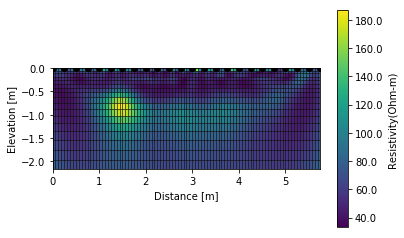

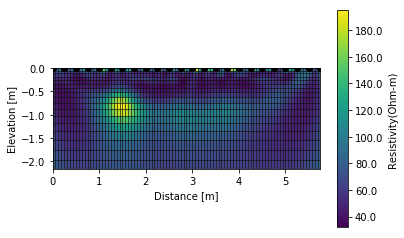

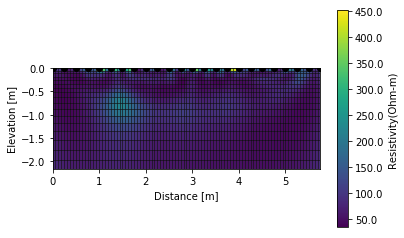

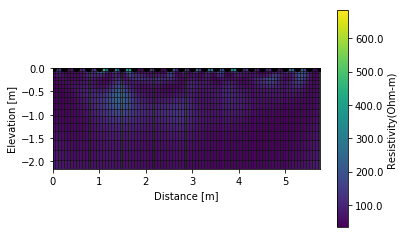

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # just to make it cleaner in the notebook
import os
import sys
sys.path.append((os.path.relpath('../..'))) # add here the relative path of the API folder

import numpy as np # this will be used to read the topography file
testdir = '../../api/test/'

from api.R2 import R2

First, let's create an R2 object and import the survey as usual.

In [19]:
k = R2() # create new R2 object and use default working directory
k.createSurvey(os.path.join(testdir, 'syscalFileTopo.csv'))

Working directory is: /media/jkl/data/phd/tmp/r2gui/api/invdir
36/636 reciprocal measurements NOT found.
3 measurements error > 20 %
278 duplicates removed.


We can also plot the pseudo-section. Note that this one remains flat event when there is topogragraphy involved.

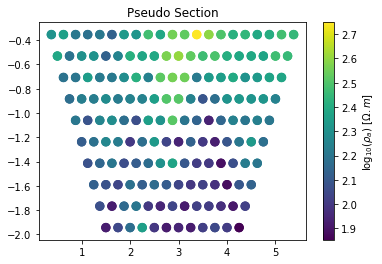

In [20]:
k.pseudo()

If we take a look at the electrodes position by plotting `R2.elec` we can see that there is no topography yet (all the values in the second column (=y) are 0.0, we don't take the 3rd column because it's a 2D survey here).

In [21]:
k.elec

array([[0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  ],
       [0.5 , 0.  , 0.  ],
       [0.75, 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.25, 0.  , 0.  ],
       [1.5 , 0.  , 0.  ],
       [1.75, 0.  , 0.  ],
       [2.  , 0.  , 0.  ],
       [2.25, 0.  , 0.  ],
       [2.5 , 0.  , 0.  ],
       [2.75, 0.  , 0.  ],
       [3.  , 0.  , 0.  ],
       [3.25, 0.  , 0.  ],
       [3.5 , 0.  , 0.  ],
       [3.75, 0.  , 0.  ],
       [4.  , 0.  , 0.  ],
       [4.25, 0.  , 0.  ],
       [4.5 , 0.  , 0.  ],
       [4.75, 0.  , 0.  ],
       [5.  , 0.  , 0.  ],
       [5.25, 0.  , 0.  ],
       [5.5 , 0.  , 0.  ],
       [5.75, 0.  , 0.  ]])

Then we can load a csv file that will add topography for each electrode. The csv file should be of the form X,Y,Z and no headers are needed.

In [22]:
x = np.genfromtxt(os.path.join(testdir, 'elecTopo.csv'), delimiter=',')
print(x)

[[ 0.    29.499  0.   ]
 [ 0.25  29.504  0.   ]
 [ 0.5   29.509  0.   ]
 [ 0.75  29.516  0.   ]
 [ 1.    29.478  0.   ]
 [ 1.25  29.461  0.   ]
 [ 1.5   29.454  0.   ]
 [ 1.75  29.428  0.   ]
 [ 2.    29.416  0.   ]
 [ 2.25  29.411  0.   ]
 [ 2.5   29.398  0.   ]
 [ 2.75  29.362  0.   ]
 [ 3.    29.329  0.   ]
 [ 3.25  29.245  0.   ]
 [ 3.5   29.159  0.   ]
 [ 3.75  29.083  0.   ]
 [ 4.    29.01   0.   ]
 [ 4.25  28.929  0.   ]
 [ 4.5   28.872  0.   ]
 [ 4.75  28.761  0.   ]
 [ 5.    28.672  0.   ]
 [ 5.25  28.593  0.   ]
 [ 5.5   28.509  0.   ]
 [ 5.75  28.412  0.   ]]


and replace `R2.elec`.

In [23]:
k.elec = x

We can now create a mesh either triangular or rectangular.

Generating gmsh input file...

adding surface points and electrodes to input file...
probing for boundaries and other additions to the mesh
0 boreholes added to input file
0 polygons added to input file
0 boundary(ies) added to input file
writing .geo to file completed, save location:
/media/jkl/data/phd/tmp/r2gui/api/exe/temp.geo

converting gmsh mesh into R2 mesh...

importing node coordinates...
reading connection matrix
ignoring 0 non-triangle elements in the mesh file, as they are not required for R2

31166 element node orderings had to be corrected becuase they were found to be orientated clockwise

saving R2 mesh file to:
/media/jkl/data/phd/tmp/r2gui/api/invdir/mesh.dat
finished converting mesh!
return mesh info option selected.
error in add_attr_dict 'cell_attributes'
3.833333333333333
Mesh plotted in 1.43055 seconds
3.833333333333333
Mesh plotted in 0.15260 seconds


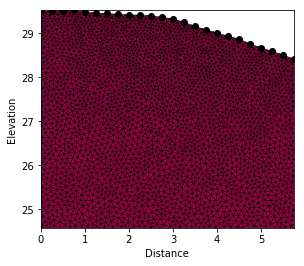

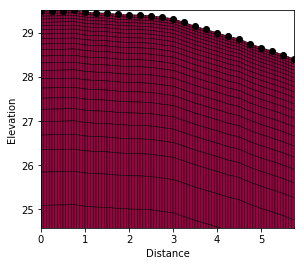

In [24]:
k.createMesh(typ='trian')
k.showMesh()
k.createMesh(typ='quad')
k.showMesh()

We can finally invert the data on this mesh. Note that it might take a while so be patient.



 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v3.2 <<

 >> D a t e : 30 - 09 - 2018
 >> My beautiful survey
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> T r u e - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 Measurements read:   164     Measurements rejected:     1
   Geometric mean of apparent resistivities:  0.34079E+03

 >> Total Memory required is:          0.238 Gb

   Iteration   1
     Initial RMS Misfit:        20.79     Number of data ignored:     0
     Alpha:    258.599   RMS Misfit:       10.99
     Alpha:    120.031   RMS Misfit:        9.10
     Alpha:     55.713   RM

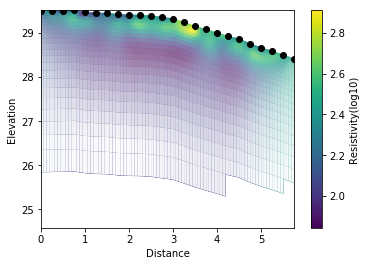

In [14]:
k.invert(iplot=True)

3.833333333333333
Mesh plotted in 0.12174 seconds


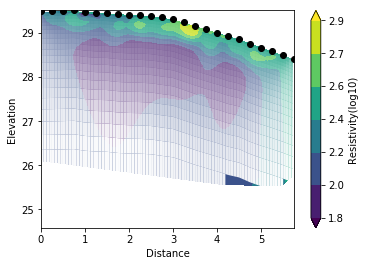

In [15]:
k.showResults(contour=True) # with contour

# In a nutshell

Working directory is: /media/jkl/data/phd/tmp/r2gui/api/invdir
36/636 reciprocal measurements NOT found.
3 measurements error > 20 %
278 duplicates removed.
Using a quadrilateral mesh


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v3.2 <<

 >> D a t e : 30 - 09 - 2018
 >> My beautiful survey
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> T r u e - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 Measurements read:   164     Measurements rejected:     1
   Geometric mean of apparent resistivities:  0.34079E+03

 >> Total Memory required is:          0.238 Gb

   Iteration   1
     Initial 

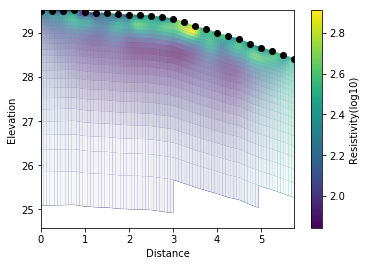

In [17]:
k = R2()
k.createSurvey('../../api/test/syscalFileTopo.csv')
k.elec = np.genfromtxt('../../api/test/elecTopo.csv', delimiter=',')
k.invert(iplot=True)